#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
Delivery_time -> Predict delivery time using sorting time.


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [53]:
data= pd.read_csv('/content/delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [54]:
data=data.rename({'Delivery Time':'Delivery_Time' , 'Sorting Time':'Sorting_Time'},axis=1)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<Axes: xlabel='Sorting_Time', ylabel='Density'>

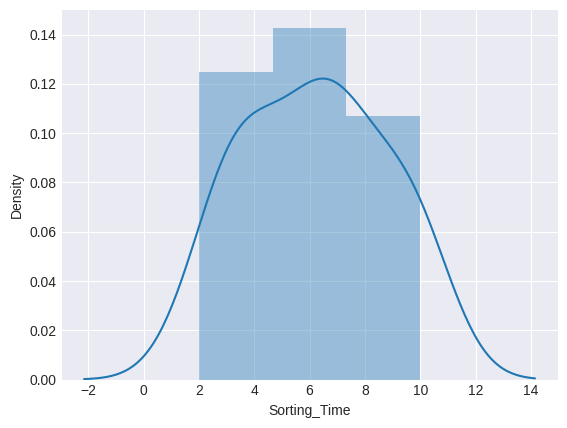

In [56]:
sns.distplot(data['Sorting_Time'])

<Axes: xlabel='Delivery_Time', ylabel='Density'>

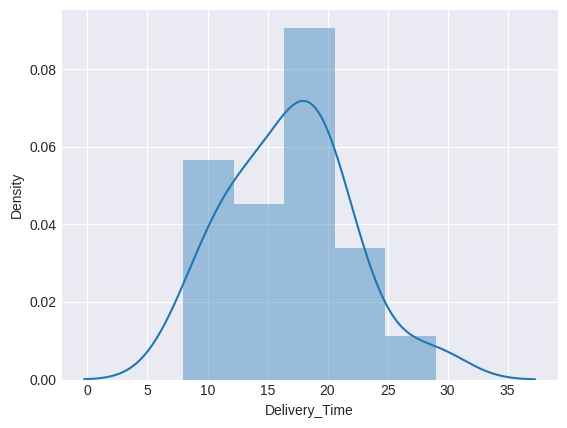

In [57]:
sns.distplot(data['Delivery_Time'])

In [58]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

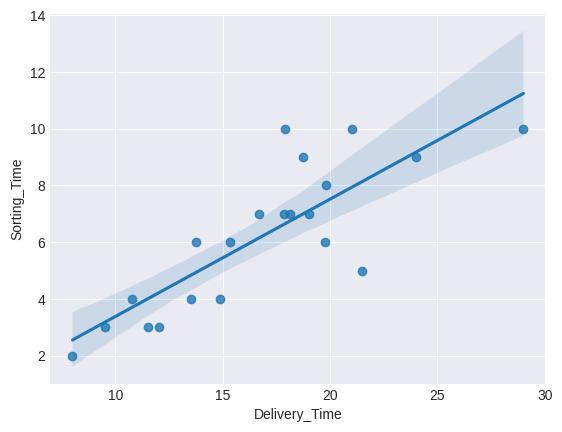

In [59]:
sns.regplot(x=data['Delivery_Time'], y=data['Sorting_Time'])

In [60]:
model_building= smf.ols('Delivery_Time~Sorting_Time',data=data).fit()

In [61]:
model_building.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        10:32:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model_building_2=smf.ols("Sorting_Time~np.log(Delivery_Time)",data=data).fit()

In [63]:
model_building_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.59e-06
Time:                        10:32:05   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(Delivery_Time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model_building_2=smf.ols("np.log(Sorting_Time)~(Delivery_Time)",data=data).fit()
model_building_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Tue, 17 Oct 2023   Prob (F-statistic):           2.64e-06
Time:                          10:32:05   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_Time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model_building_2=smf.ols("np.log(Sorting_Time)~Delivery_Time+pow(Delivery_Time,2)",data=data).fit()

In [66]:
model_building_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Tue, 17 Oct 2023   Prob (F-statistic):           6.77e-07
Time:                          10:32:05   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.7780      0.450     -1.730      0.101      -1.723       0.167
Delivery_Time             0.2272      0.052      4.346      0.000       0.117       0.337
pow(Delivery_Time, 2)    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
model_building_2=smf.ols("np.log(Sorting_Time)~(Delivery_Time)",data=data).fit()
model_building_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Tue, 17 Oct 2023   Prob (F-statistic):           2.64e-06
Time:                          10:32:05   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_Time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model_building_2=smf.ols("np.log(Sorting_Time)~Delivery_Time+pow(Delivery_Time,2)",data=data).fit()
model_building_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Tue, 17 Oct 2023   Prob (F-statistic):           6.77e-07
Time:                          10:32:05   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.7780      0.450     -1.730      0.101      -1.723       0.167
Delivery_Time             0.2272      0.052      4.346      0.000       0.117       0.337
pow(Delivery_Time, 2)    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
model_building_2=smf.ols("np.log(Sorting_Time)~(Delivery_Time)",data=data).fit()
model_building_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Tue, 17 Oct 2023   Prob (F-statistic):           2.64e-06
Time:                          10:32:05   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_Time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
model_building_3=smf.ols("np.log(Sorting_Time)~Delivery_Time+pow(Delivery_Time,2)",data=data).fit()
model_building_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Tue, 17 Oct 2023   Prob (F-statistic):           6.77e-07
Time:                          10:32:05   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.7780      0.450     -1.730      0.101      -1.723       0.167
Delivery_Time             0.2272      0.052      4.346      0.000       0.117       0.337
pow(Delivery_Time, 2)    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Sorting_Time')

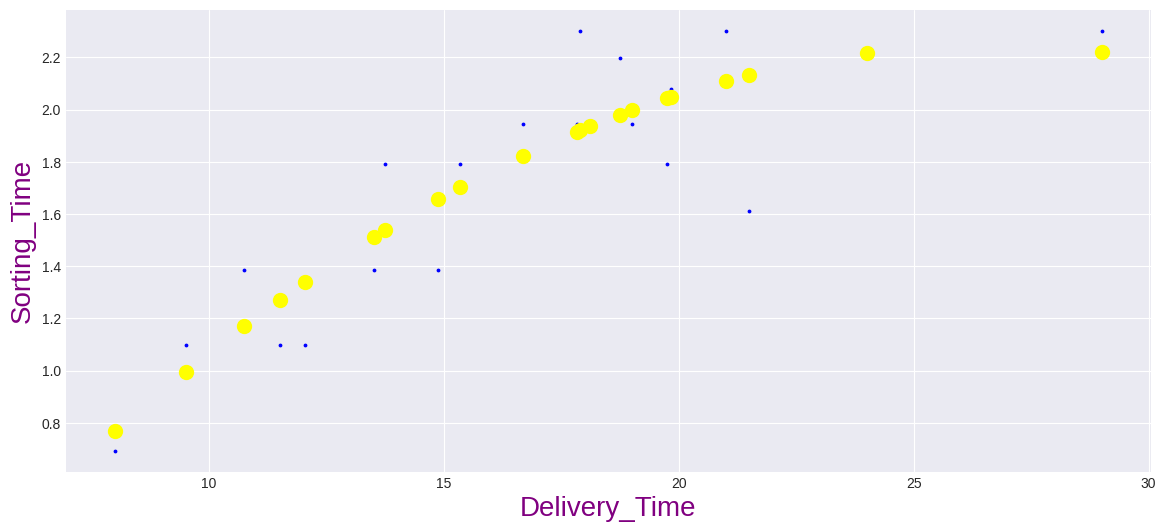

In [71]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(data["Delivery_Time"],np.log(data["Sorting_Time"]),color="blue",s=3)
plt.scatter(data["Delivery_Time"],model_building_3.fittedvalues,color="yellow",s=100)

plt.xlabel("Delivery_Time",size=20,color="purple")
plt.ylabel("Sorting_Time",size=20,color="purple")

#Salary_hike -> Build a prediction model for Salary_hike.Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [73]:
data=pd.read_csv("/content/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Density'>

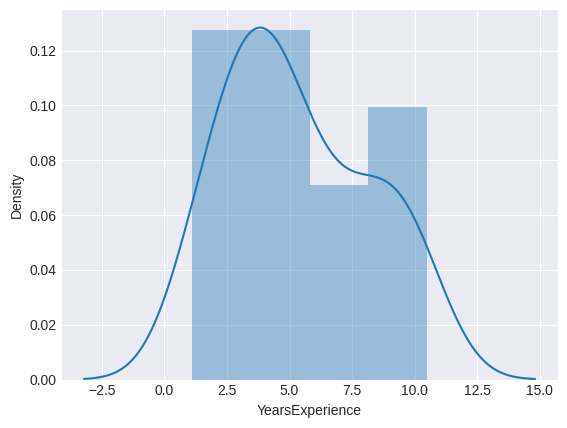

In [75]:
sns.distplot(data['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

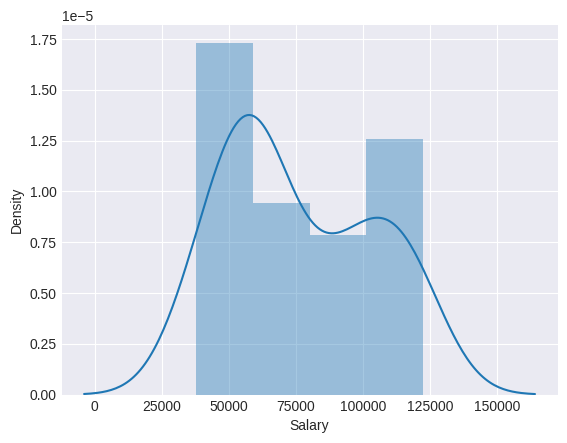

In [76]:
sns.distplot(data['Salary'])

In [77]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

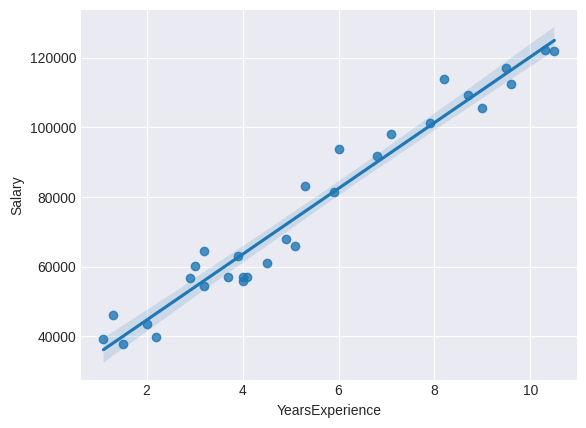

In [78]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [79]:
model_building = smf.ols('YearsExperience~Salary',data=data).fit()
model_building.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        10:32:06   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
model_building_2=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()
model_building_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           3.25e-13
Time:                        10:32:07   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model_building_2=smf.ols("np.log(Salary)~(YearsExperience)",data=data).fit()
model_building_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           7.03e-18
Time:                        10:32:07   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
model_building_3=smf.ols("np.log(Salary)~YearsExperience+pow(YearsExperience,2)",data=data).fit()
model_building_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           3.95e-18
Time:                        10:32:07   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience             0.2024      0.027      7.601      0.000       0.148       0.257
pow(YearsExperience, 2)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Salary')

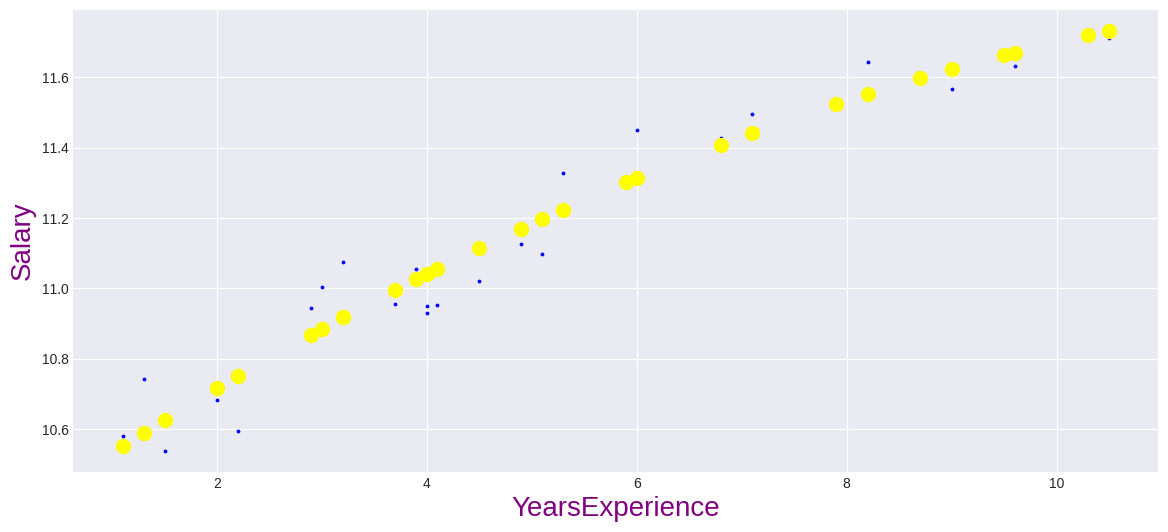

In [83]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(data["YearsExperience"],np.log(data["Salary"]),color="blue",s=3)
plt.scatter(data["YearsExperience"],model_building_3.fittedvalues,color="yellow",s=100)

plt.xlabel("YearsExperience",size=20,color="purple")
plt.ylabel("Salary",size=20,color="purple")